# Trabajo Práctico 2 - Clasificación

## Tecnicatura Universitaria en Inteligencia Artificial - FCEIA

## Aprendizaje Automático 1

---

### Objetivo del Trabajo

Desarrollar un modelo de clasificación binaria para **predecir si lloverá al día siguiente** en diferentes ciudades de Australia, utilizando datos meteorológicos históricos. El modelo debe ser capaz de realizar predicciones a las 23:59:59hs de cada día.


### Herramientas y Tecnologías

- **scikit-learn**: Pre-procesamiento de datos, implementación de modelos de clasificación y evaluación de métricas
- **TensorFlow**: Entrenamiento de redes neuronales
- **Docker**: Puesta en producción del modelo seleccionado


### Dataset: Weather Australia

El dataset `weatherAUS.csv` contiene información climática de Australia de los últimos 10 años, con observaciones de múltiples ciudades (columna `Location`). La variable objetivo es `RainTomorrow`, que indica si al día siguiente llovió o no.

---

### Integrantes:

**Florencia Mezzano**, **Fabrizio Tapia**, **Sebastián Perez**

---


## 0. Carga de Datos

In [102]:
# Importación de librerías básicas para análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [103]:
df = pd.read_csv('weatherAUS.csv')

print(f'Dimensiones: {df.shape[0]:,} x {df.shape[1]}')
print(f'Período de datos: {df["Date"].min()} a {df["Date"].max()}')
print(f'Número de ciudades: {df["Location"].nunique()}')

Dimensiones: 145,460 x 23
Período de datos: 2007-11-01 a 2017-06-25
Número de ciudades: 49


###  0.1 Exploración Inicial del Dataset

In [104]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [106]:
print("Columnas del dataset:\n")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:2d}. {col:20s} - {dtype}")

Columnas del dataset:

 1. Date                 - object
 2. Location             - object
 3. MinTemp              - float64
 4. MaxTemp              - float64
 5. Rainfall             - float64
 6. Evaporation          - float64
 7. Sunshine             - float64
 8. WindGustDir          - object
 9. WindGustSpeed        - float64
10. WindDir9am           - object
11. WindDir3pm           - object
12. WindSpeed9am         - float64
13. WindSpeed3pm         - float64
14. Humidity9am          - float64
15. Humidity3pm          - float64
16. Pressure9am          - float64
17. Pressure3pm          - float64
18. Cloud9am             - float64
19. Cloud3pm             - float64
20. Temp9am              - float64
21. Temp3pm              - float64
22. RainToday            - object
23. RainTomorrow         - object


## 1. CLUSTERING

In [107]:
print(f'Cantidad de ciudades en el dataset: {df["Location"].value_counts().count()}')
print(f'Cantidad de valores nulos: {df["Location"].isna().sum()}')
print('----------Ciudades----------')
print(df["Location"].value_counts().sort_index())

Cantidad de ciudades en el dataset: 49
Cantidad de valores nulos: 0
----------Ciudades----------
Location
Adelaide            3193
Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale               

### 1.1 OPCIONES DE CLUSTERING (ELEGIR UNO)

#### kmeans de scikit-learn

Tambien hay otras opciones de modelos de scikit-learn para usar

https://scikit-learn.org/stable/modules/clustering.html

##### Diccionario coordenadas de ciudades

In [108]:
city_coords = {
    # --- New South Wales (NSW) ---
    'Albury': (-36.0737, 146.9135),
    'BadgerysCreek': (-33.8820, 150.7170),
    'Cobar': (-31.4980, 145.8380),
    'CoffsHarbour': (-30.2963, 153.1157),
    'Moree': (-29.4657, 149.8410),
    'Newcastle': (-32.9283, 151.7817),
    'NorahHead': (-33.2820, 151.5770),
    'NorfolkIsland': (-29.0330, 167.9500),
    'Penrith': (-33.7510, 150.6940),
    'Richmond': (-33.6000, 150.7800),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9461, 151.1772),
    'WaggaWagga': (-35.1189, 147.3697),
    'Williamtown': (-32.7950, 151.8350),
    'Wollongong': (-34.4278, 150.8931),

    # --- Australian Capital Territory (ACT) ---
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4240, 149.0910),
    'MountGinini': (-35.5290, 148.7720),

    # --- Victoria (VIC) ---
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7570, 144.2794),
    'Sale': (-38.1106, 147.0684),
    'MelbourneAirport': (-37.6690, 144.8410),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1850, 142.1620),
    'Nhil': (-36.3333, 141.6500),
    'Portland': (-38.3420, 141.6050),
    'Watsonia': (-37.7167, 145.0833),
    'Dartmoor': (-37.9200, 141.2830),

    # --- Queensland (QLD) ---
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9203, 145.7700),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2590, 146.8169),

    # --- South Australia (SA) ---
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8310, 140.7790),
    'Nuriootpa': (-34.4680, 138.9970),
    'Woomera': (-31.2000, 136.8167),

    # --- Western Australia (WA) ---
    'Albany': (-35.0228, 117.8814),
    'Witchcliffe': (-34.0100, 115.1000),
    'PearceRAAF': (-31.6670, 116.0170),
    'PerthAirport': (-31.9403, 115.9672),
    'Perth': (-31.9523, 115.8613),
    'SalmonGums': (-33.0860, 121.6370),
    'Walpole': (-34.9730, 116.7340),

    # --- Tasmania (TAS) ---
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4332, 147.1441),

    # --- Northern Territory (NT) ---
    'AliceSprings': (-23.6980, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4650, 132.2630),
    'Uluru': (-25.3444, 131.0369)
}

##### Implementacion

In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [110]:
cities = sorted(df['Location'].unique())

loc_df = (pd.DataFrame({'Location': cities})
          .assign(lat=lambda d: d['Location'].map(lambda x: city_coords.get(x, (np.nan, np.nan))[0]),
                  lon=lambda d: d['Location'].map(lambda x: city_coords.get(x, (np.nan, np.nan))[1])))
assert loc_df['lat'].notna().all() and loc_df['lon'].notna().all(), "Faltan coordenadas para alguna Location."
loc_df.head()

,Location,lat,lon
0,Adelaide,-34.9285,138.6007
1,Albany,-35.0228,117.8814
2,Albury,-36.0737,146.9135
3,AliceSprings,-23.6980,133.8807
4,BadgerysCreek,-33.8820,150.7170


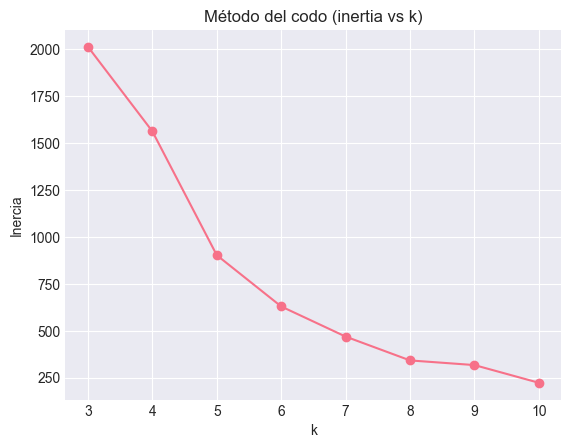

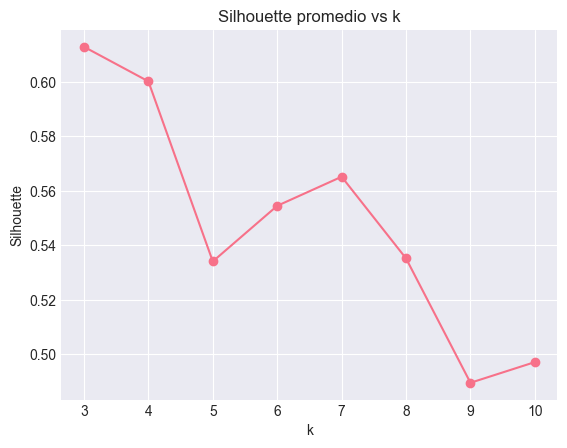

In [111]:
X_loc = loc_df[['lat', 'lon']].to_numpy()
inertias, silhouettes, ks = [], [], range(3, 11)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_loc)
    inertias.append(km.inertia_)
    labels = km.labels_
    silhouettes.append(silhouette_score(X_loc, labels))

fig, ax = plt.subplots()
ax.plot(list(ks), inertias, marker='o')
ax.set_title('Método del codo (inertia vs k)')
ax.set_xlabel('k'); ax.set_ylabel('Inercia'); plt.show()

fig, ax = plt.subplots()
ax.plot(list(ks), silhouettes, marker='o')
ax.set_title('Silhouette promedio vs k')
ax.set_xlabel('k'); ax.set_ylabel('Silhouette'); plt.show()

PROBAR DIFERENTES VALORES DE K

In [112]:
#le pase los graficos al chat y me recomendo usar k=6, se podria probar con 4 o con 8 para ver diferencias
k_opt = 6   # ← ajustá según tus gráficos y comenta por qué

kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init='auto').fit(X_loc)
loc_df['Region'] = kmeans.labels_

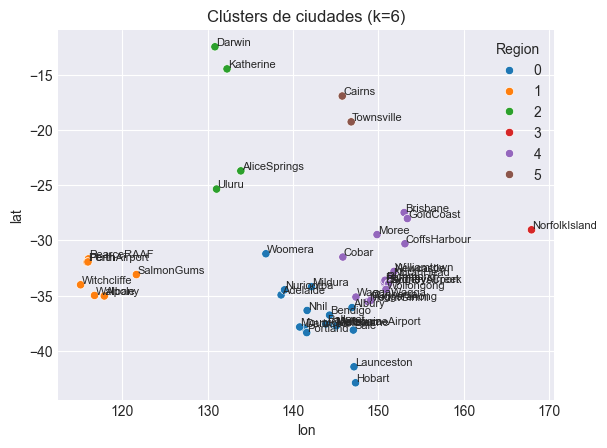

In [113]:
plt.figure()
sns.scatterplot(data=loc_df, x='lon', y='lat', hue='Region', palette='tab10')
for _, r in loc_df.iterrows():
    plt.text(r['lon']+0.1, r['lat']+0.1, r['Location'], fontsize=8)
plt.title(f'Clústers de ciudades (k={k_opt})')
plt.show()

In [114]:
df = df.merge(loc_df[['Location','Region']], on='Location', how='left')
df['Region'] = df['Region'].astype('category')

#### Regiones de australia

9 clusters: 6 estados y 2 territorios nacionales (queda fuera la isla Norfolk, no pertenece a ningun estado)
https://www.educaraustralia.com/Vivir-en-Australia/Regiones-de-Australia

In [115]:
city_to_state = {
    'Adelaide':'SA', 'Albany':'WA', 'Albury':'NSW', 'AliceSprings':'NT',
    'BadgerysCreek':'NSW', 'Ballarat':'VIC', 'Bendigo':'VIC', 'Brisbane':'QLD',
    'Cairns':'QLD', 'Canberra':'ACT', 'Cobar':'NSW', 'CoffsHarbour':'NSW',
    'Dartmoor':'VIC', 'Darwin':'NT', 'GoldCoast':'QLD', 'Hobart':'TAS',
    'Katherine':'NT', 'Launceston':'TAS', 'Melbourne':'VIC', 'MelbourneAirport':'VIC',
    'Mildura':'VIC', 'Moree':'NSW', 'MountGambier':'SA', 'MountGinini':'ACT',
    'Newcastle':'NSW', 'Nhil':'VIC', 'NorahHead':'NSW', 'NorfolkIsland':'External Territory',
    'Nuriootpa':'SA', 'PearceRAAF':'WA', 'Penrith':'NSW', 'Perth':'WA',
    'PerthAirport':'WA', 'Portland':'VIC', 'Richmond':'NSW', 'Sale':'VIC',
    'SalmonGums':'WA', 'Sydney':'NSW', 'SydneyAirport':'NSW', 'Townsville':'QLD',
    'Tuggeranong':'ACT', 'Uluru':'NT', 'WaggaWagga':'NSW', 'Walpole':'WA',
    'Watsonia':'VIC', 'Williamtown':'NSW', 'Witchcliffe':'WA', 'Wollongong':'NSW',
    'Woomera':'SA'
}

state_full = {
    'NSW':'New South Wales', 'VIC':'Victoria', 'QLD':'Queensland',
    'SA':'South Australia', 'WA':'Western Australia', 'TAS':'Tasmania',
    'NT':'Northern Territory', 'ACT':'Australian Capital Territory',
    'External Territory':'External Territory'
}

df['State'] = df['Location'].map(city_to_state)
df['StateName'] = df['State'].map(state_full)

#### NRM Regions - APORTE DE MARTIN

Clusters por regiones segun condiciones climaticas y de recursos naturales hecho por una pagina oficial del gobierno de Australia
https://www.climatechangeinaustralia.gov.au/en/overview/methodology/nrm-regions/

Australia se divide oficialmente en 56 Natural Resource Management Regions, agrupadas por el gobierno en seis grandes NRM Clusters según sus condiciones climáticas, ecológicas y geográficas.
Estas regiones —Northern Australia, Wet Tropics, Rangelands, Southern Slopes, South-Eastern Australia y South-West WA— son equivalentes a las regiones ambientales argentinas (NOA, NEA, Cuyo, Pampeana, Patagonia, etc.), por lo que se utilizan como referencia para validar o justificar la agrupación de ciudades realizada.

In [116]:
import geopandas as gpd

# Leer el shapefile completo
nrm = gpd.read_file("NRM_clusters.shp")

nrm = nrm.to_crs(epsg=4326)
print(nrm.crs)  # debe decir EPSG:4326

EPSG:4326


In [117]:
# --- 2. Crear GeoDataFrame con tus ciudades y coordenadas del diccionario ---
ciudades = pd.DataFrame({
    'Location': sorted(df['Location'].unique())
})
ciudades['Latitude']  = ciudades['Location'].map(lambda c: city_coords[c][0])
ciudades['Longitude'] = ciudades['Location'].map(lambda c: city_coords[c][1])

ciudades_gdf = gpd.GeoDataFrame(
    ciudades,
    geometry=gpd.points_from_xy(ciudades['Longitude'], ciudades['Latitude']),
    crs="EPSG:4326"
)

# --- 3. Unión espacial (cada ciudad con su polígono NRM) ---
joined = gpd.sjoin(ciudades_gdf, nrm[['code','label','geometry']], how="left", predicate="within")

# --- 4. Renombrar y quedarte con columnas útiles ---
joined = joined.rename(columns={'code': 'NRM_code', 'label': 'NRM_label'})
ciudades_cluster = joined[['Location', 'NRM_code', 'NRM_label']]

# --- 5. Agregar los clusters al df principal ---
df = df.merge(ciudades_cluster, on='Location', how='left')

# --- 6. Verificación rápida ---
#print('✅ Clusters agregados al df')
#print(df[['Location', 'NRM_label']].drop_duplicates().sort_values('Location').to_string(index=False))

# Después del spatial join, asignar manualmente Norfolk Island
df.loc[df['Location'] == 'NorfolkIsland', 'NRM_label'] = 'External Territory'  # o el cluster más cercano
df.loc[df['Location'] == 'NorfolkIsland', 'NRM_code'] = 'External Territory'  # código apropiado

# Agregar coordenadas de latitud y longitud al dataframe principal
df['Latitude'] = df['Location'].map(lambda x: city_coords.get(x, (None, None))[0])
df['Longitude'] = df['Location'].map(lambda x: city_coords.get(x, (None, None))[1])

# Verificar que se agregaron correctamente
print("Coordenadas agregadas:")
print(df[['Location', 'Latitude', 'Longitude']].drop_duplicates().head(10))

# Verificar si hay valores nulos (ciudades sin coordenadas)
print(f"\nCiudades sin coordenadas: {df['Latitude'].isna().sum()}")

# (opcional) Ver cantidad de ciudades por cluster
print('\nDistribución por cluster:')
print(df["NRM_label"].value_counts().sum())

Coordenadas agregadas:
            Location  Latitude  Longitude
0             Albury  -36.0737   146.9135
3040   BadgerysCreek  -33.8820   150.7170
6049           Cobar  -31.4980   145.8380
9058    CoffsHarbour  -30.2963   153.1157
12067          Moree  -29.4657   149.8410
15076      Newcastle  -32.9283   151.7817
18115      NorahHead  -33.2820   151.5770
21119  NorfolkIsland  -29.0330   167.9500
24128        Penrith  -33.7510   150.6940
27167       Richmond  -33.6000   150.7800

Ciudades sin coordenadas: 0

Distribución por cluster:
145460


#### comparacion entre los 3 clusterings

In [118]:
print('----------Kmeans----------')
print(df['Region'].value_counts())

----------Kmeans----------
Region
4    55286
0    50429
1    21267
2     9389
5     6080
3     3009
Name: count, dtype: int64


In [119]:
print('----------State-----------')
print(df['State'].value_counts())

----------State-----------
State
NSW                   42578
VIC                   28905
WA                    21267
QLD                   12313
SA                    12251
ACT                    9515
NT                     9389
TAS                    6233
External Territory     3009
Name: count, dtype: int64


In [120]:
print('----------Región----------')
print(df['NRM_code'].value_counts())

----------Región----------
NRM_code
EC                    33704
SS                    30551
SSWF                  27469
MB                    26231
R                     10636
MN                     7811
WT                     3040
CS                     3009
External Territory     3009
Name: count, dtype: int64


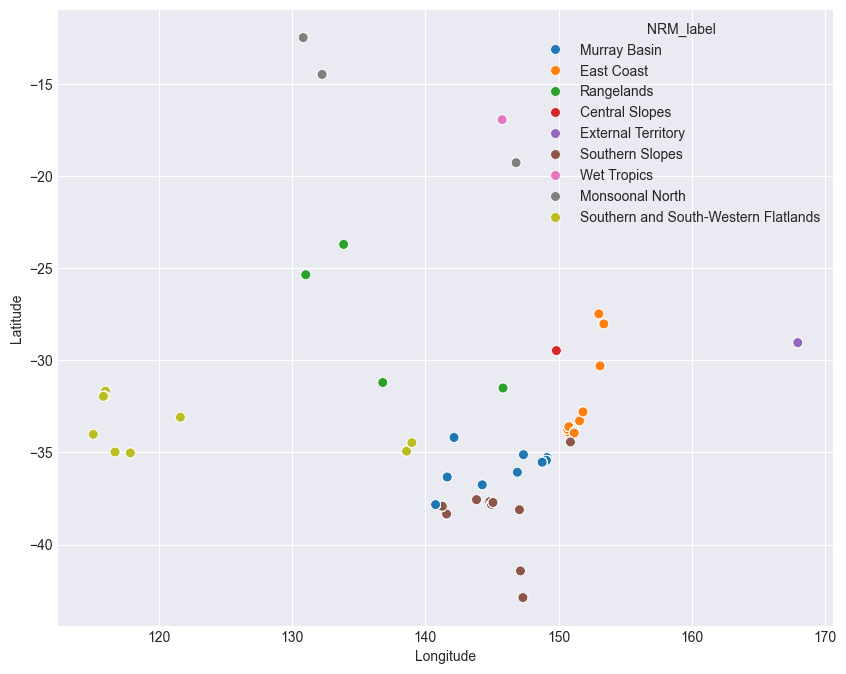

In [121]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='NRM_label', palette='tab10', s=50)
plt.show()

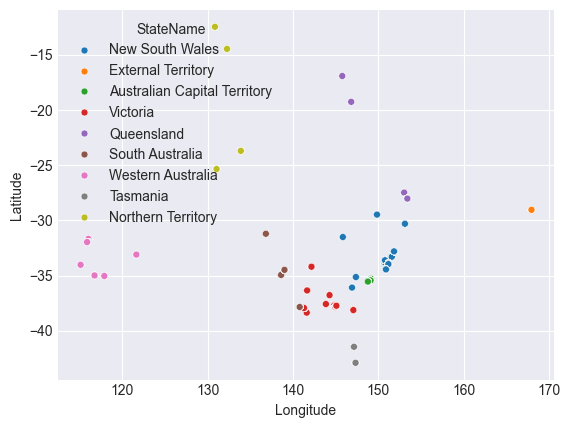

In [122]:
# Scatter con hue de estados
plt.figure()
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='StateName', palette='tab10', s=25)
plt.show()

## 2. EDA 

### 2.0 Clasificacion de Variables por Tipo

El dataset contiene 23 variables que se clasifican de la siguiente manera:

#### Clasificacion de Variables

---

**Variables Numericas Continuas (14)**
- MinTemp
- MaxTemp
- Rainfall
- Evaporation
- Sunshine
- WindGustSpeed
- WindSpeed9am
- WindSpeed3pm
- Humidity9am
- Humidity3pm
- Pressure9am
- Pressure3pm
- Temp9am
- Temp3pm

---

**Variables Numericas Discretas (2)**
- Cloud9am
- Cloud3pm

---

**Variables Categoricas Ordinales (3)**
- WindGustDir
- WindDir9am
- WindDir3pm

---

**Variables Categoricas Nominales (3)**
- Location
- RainToday
- RainTomorrow

---

**Variables Temporales (1)**
- Date

---

**Total: 23 variables**

| **Columna**       | **Descripción / Significado**                                   | **Rango o valores típicos**                                                              |
| ----------------- | --------------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **Date**          | Fecha de la observación meteorológica.                          | De 2007 a 2017 aprox. (10 años de datos).                                                |
| **Location**      | Ciudad o estación meteorológica donde se registraron los datos. | 49 ciudades                                                       |
| **MinTemp**       | Temperatura mínima del día (°C).                                | Entre -8 °C y 30 °C.                                                                     |
| **MaxTemp**       | Temperatura máxima del día (°C).                                | Entre 5 °C y 50 °C.                                                                      |
| **Rainfall**      | Precipitación total registrada ese día (mm).                    | 0 – 370 mm (valores altos son raros, >100 mm suelen ser outliers).                       |
| **Evaporation**   | Evaporación medida en la bandeja de clase A (mm).               | 0 – 25 mm (promedio suele ser 4 – 7 mm).                                                 |
| **Sunshine**      | Horas de sol por día.                                           | 0 – 14 h (depende de la estación).                                                       |
| **WindGustDir**   | Dirección del viento más fuerte del día (punto cardinal).       | 16 valores posibles: N, NNE, NE, ENE, E, ESE, SE, SSE, S, SSW, SW, WSW, W, WNW, NW, NNW. |
| **WindGustSpeed** | Velocidad máxima del viento (km/h).                             | 6 – 135 km/h aprox.                                                                      |
| **WindDir9am**    | Dirección del viento a las 9 AM (punto cardinal).               | Mismos 16 valores.                                                                       |
| **WindDir3pm**    | Dirección del viento a las 3 PM (punto cardinal).               | Mismos 16 valores.                                                                       |
| **WindSpeed9am**  | Velocidad del viento a las 9 AM (km/h).                         | 0 – 70 km/h (media ~15).                                                                 |
| **WindSpeed3pm**  | Velocidad del viento a las 3 PM (km/h).                         | 0 – 70 km/h (media ~20).                                                                 |
| **Humidity9am**   | Humedad relativa a las 9 AM (%).                                | 0 – 100 %.                                                                               |
| **Humidity3pm**   | Humedad relativa a las 3 PM (%).                                | 0 – 100 %.                                                                               |
| **Pressure9am**   | Presión atmosférica a las 9 AM (hPa).                           | 980 – 1045 hPa (media ~1015).                                                            |
| **Pressure3pm**   | Presión atmosférica a las 3 PM (hPa).                           | 980 – 1045 hPa.                                                                          |
| **Cloud9am**      | Fracción del cielo cubierto por nubes a las 9 AM (en octavos).  | 0 – 8 (entero).                                                                          |
| **Cloud3pm**      | Fracción del cielo cubierto por nubes a las 3 PM (en octavos).  | 0 – 8 (entero).                                                                          |
| **Temp9am**       | Temperatura a las 9 AM (°C).                                    | -5 – 35 °C.                                                                              |
| **Temp3pm**       | Temperatura a las 3 PM (°C).                                    | -5 – 45 °C.                                                                              |
| **RainToday**     | Variable binaria que indica si llovió ese día (1 mm o más).     | "Yes" / "No".                                                                            |
| **RainTomorrow**  | Variable objetivo (target): indica si llovió al día siguiente.  | "Yes" / "No".                                                                            |

### 2.1 Estadisticas Descriptivas de Variables Numericas

Analisis detallado de las variables numericas del dataset, incluyendo medidas de tendencia central, dispersion y valores faltantes.

In [123]:
# Seleccionar solo variables numericas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calcular estadisticas
stats = df[numeric_cols].describe().T

# Agregar informacion de valores faltantes
stats["missing"] = df[numeric_cols].isnull().sum()
stats["missing_%"] = (stats["missing"] / len(df) * 100).round(2)

# Reordenar columnas
stats = stats[["count", "missing", "missing_%", "mean", "std", "min", "25%", "50%", "75%", "max"]]

print("=" * 100)
print("ESTADISTICAS DESCRIPTIVAS DE VARIABLES NUMERICAS")
print("=" * 100)
print(f"\nTotal de variables numericas: {len(numeric_cols)}\n")
stats

ESTADISTICAS DESCRIPTIVAS DE VARIABLES NUMERICAS

Total de variables numericas: 18



,count,missing,missing_%,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,1485,1.02,12.194034,6.398495,-8.5000,7.6000,12.0000,16.900,33.9000
MaxTemp,144199.0,1261,0.87,23.221348,7.119049,-4.8000,17.9000,22.6000,28.200,48.1000
Rainfall,142199.0,3261,2.24,2.360918,8.478060,0.0000,0.0000,0.0000,0.800,371.0000
Evaporation,82670.0,62790,43.17,5.468232,4.193704,0.0000,2.6000,4.8000,7.400,145.0000
Sunshine,75625.0,69835,48.01,7.611178,3.785483,0.0000,4.8000,8.4000,10.600,14.5000
WindGustSpeed,135197.0,10263,7.06,40.035230,13.607062,6.0000,31.0000,39.0000,48.000,135.0000
WindSpeed9am,143693.0,1767,1.21,14.043426,8.915375,0.0000,7.0000,13.0000,19.000,130.0000
WindSpeed3pm,142398.0,3062,2.11,18.662657,8.809800,0.0000,13.0000,19.0000,24.000,87.0000
Humidity9am,142806.0,2654,1.82,68.880831,19.029164,0.0000,57.0000,70.0000,83.000,100.0000
Humidity3pm,140953.0,4507,3.10,51.539116,20.795902,0.0000,37.0000,52.0000,66.000,100.0000


#### Interpretacion de Estadisticas Descriptivas

**Observaciones clave:**

- **Temperatura**: Rango amplio desde valores negativos hasta ~46°C
- **Precipitacion (Rainfall)**: Alta variabilidad, mayoria de dias sin lluvia (mediana = 0)
- **Humedad**: Valores entre 0-100%, con mayor humedad en la manana (9am)
- **Presion atmosferica**: Relativamente estable, rango 980-1040 hPa
- **Viento**: Velocidades variables, rafagas pueden superar 100 km/h
- **Valores faltantes**: Sunshine (~48%), Evaporation (~43%), Cloud (~40%) tienen muchos datos faltantes

### 2.2 Analisis de Variables Categoricas

Exploracion de las variables categoricas del dataset: frecuencias, distribucion y valores unicos.

In [124]:
# Identificar variables categoricas
categorical_cols = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]

print("=" * 100)
print("RESUMEN DE VARIABLES CATEGORICAS")
print("=" * 100)
print(f"\n{'Variable':<20} {'Valores Unicos':<20} {'Valores Faltantes':<20} {'% Faltantes':<15}")
print("-" * 100)

for col in categorical_cols:
    n_unique = df[col].nunique()
    n_missing = df[col].isnull().sum()
    pct_missing = (n_missing / len(df) * 100)
    print(f"{col:<20} {n_unique:<20} {n_missing:<20} {pct_missing:<15.2f}")

print("-" * 100)

RESUMEN DE VARIABLES CATEGORICAS

Variable             Valores Unicos       Valores Faltantes    % Faltantes    
----------------------------------------------------------------------------------------------------
Location             49                   0                    0.00           
WindGustDir          16                   10326                7.10           
WindDir9am           16                   10566                7.26           
WindDir3pm           16                   4228                 2.91           
RainToday            2                    3261                 2.24           
RainTomorrow         2                    3267                 2.25           
----------------------------------------------------------------------------------------------------


#### Analisis Detallado por Variable Categorica

In [125]:
# Analisis detallado de Location
print("=" * 100)
print("VARIABLE: Location (Ciudad)")
print("=" * 100)
print(f"\nTotal de ciudades: {df['Location'].nunique()}")
print(f"Valores faltantes: {df['Location'].isnull().sum()}\n")
print("Top 10 ciudades con mas observaciones:")
print(df["Location"].value_counts().head(10))

VARIABLE: Location (Ciudad)

Total de ciudades: 49
Valores faltantes: 0

Top 10 ciudades con mas observaciones:
Location
Canberra        3436
Sydney          3344
Darwin          3193
Melbourne       3193
Brisbane        3193
Adelaide        3193
Perth           3193
Hobart          3193
Albany          3040
MountGambier    3040
Name: count, dtype: int64


In [126]:
# Analisis de direcciones de viento
print("=" * 100)
print("VARIABLES: Direcciones de Viento")
print("=" * 100)

wind_vars = ["WindGustDir", "WindDir9am", "WindDir3pm"]

for var in wind_vars:
    print(f"\n>> {var}")
    print("-" * 80)
    print(f"Valores unicos: {df[var].nunique()}")
    print(f"Valores faltantes: {df[var].isnull().sum()} ({df[var].isnull().sum()/len(df)*100:.2f}%)\n")
    print("Distribucion (Top 10):")
    print(df[var].value_counts().head(10))
    print()

VARIABLES: Direcciones de Viento

>> WindGustDir
--------------------------------------------------------------------------------
Valores unicos: 16
Valores faltantes: 10326 (7.10%)

Distribucion (Top 10):
WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
Name: count, dtype: int64


>> WindDir9am
--------------------------------------------------------------------------------
Valores unicos: 16
Valores faltantes: 10566 (7.26%)

Distribucion (Top 10):
WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
Name: count, dtype: int64


>> WindDir3pm
--------------------------------------------------------------------------------
Valores unicos: 16
Valores faltantes: 4228 (2.91%)

Distribucion (Top 10):
WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8

In [127]:
# Analisis de RainToday
print("=" * 100)
print("VARIABLE: RainToday (Lluvia Hoy)")
print("=" * 100)
print(f"\nValores faltantes: {df['RainToday'].isnull().sum()} ({df['RainToday'].isnull().sum()/len(df)*100:.2f}%)\n")
print("Distribucion:")
print(df["RainToday"].value_counts())
print("\nPorcentaje:")
print(df["RainToday"].value_counts(normalize=True) * 100)

VARIABLE: RainToday (Lluvia Hoy)

Valores faltantes: 3261 (2.24%)

Distribucion:
RainToday
No     110319
Yes     31880
Name: count, dtype: int64

Porcentaje:
RainToday
No     77.580714
Yes    22.419286
Name: proportion, dtype: float64


In [128]:
# Analisis de RainTomorrow (Variable Objetivo)
print("=" * 100)
print("VARIABLE OBJETIVO: RainTomorrow (Lluvia Manana)")
print("=" * 100)
print(f"\nValores faltantes: {df['RainTomorrow'].isnull().sum()} ({df['RainTomorrow'].isnull().sum()/len(df)*100:.2f}%)\n")
print("Distribucion:")
print(df["RainTomorrow"].value_counts())
print("\nPorcentaje:")
print(df["RainTomorrow"].value_counts(normalize=True) * 100)

# Calcular desbalance
counts = df["RainTomorrow"].value_counts()
if len(counts) == 2:
    ratio = counts.max() / counts.min()
    print(f"\nRatio de desbalance: {ratio:.2f}:1")
    if ratio > 1.5:
        print("ATENCION: Dataset desbalanceado - considerar tecnicas de balanceo (SMOTE, class_weight, etc.)")

VARIABLE OBJETIVO: RainTomorrow (Lluvia Manana)

Valores faltantes: 3267 (2.25%)

Distribucion:
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

Porcentaje:
RainTomorrow
No     77.581878
Yes    22.418122
Name: proportion, dtype: float64

Ratio de desbalance: 3.46:1
ATENCION: Dataset desbalanceado - considerar tecnicas de balanceo (SMOTE, class_weight, etc.)


#### Visualizacion de Variables Categoricas

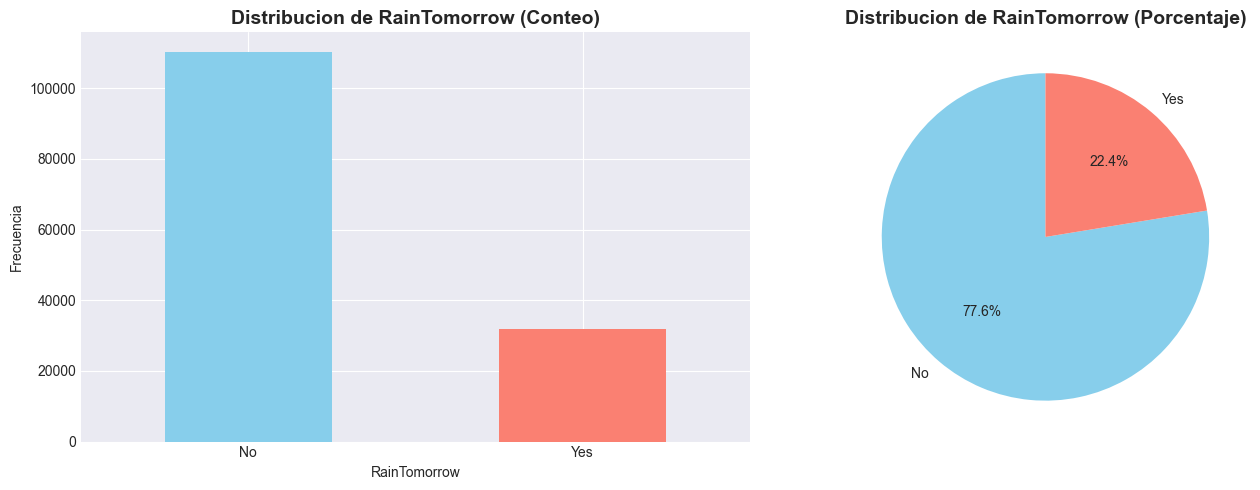

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafico de barras
df["RainTomorrow"].value_counts().plot(kind="bar", ax=axes[0], color=["skyblue", "salmon"])
axes[0].set_title("Distribucion de RainTomorrow (Conteo)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("RainTomorrow")
axes[0].set_ylabel("Frecuencia")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Grafico de torta
df["RainTomorrow"].value_counts().plot(kind="pie", ax=axes[1], autopct="%1.1f%%",
                                        colors=["skyblue", "salmon"], startangle=90)
axes[1].set_title("Distribucion de RainTomorrow (Porcentaje)", fontsize=14, fontweight="bold")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

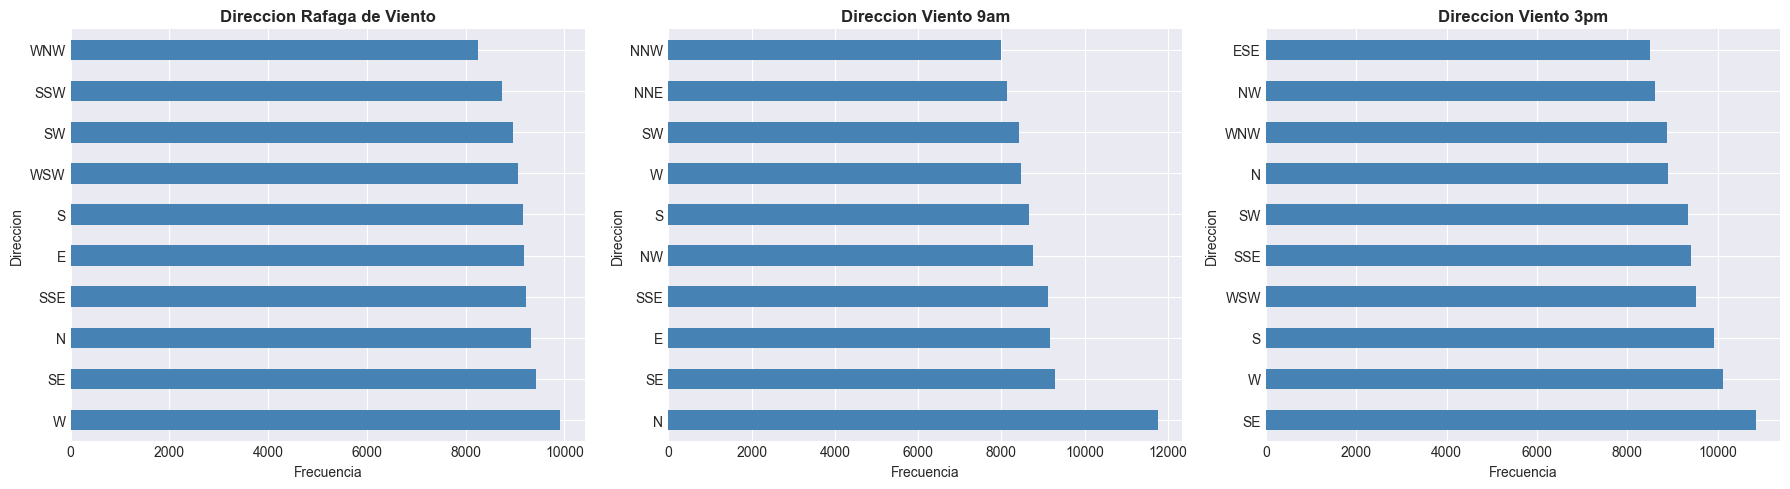

In [130]:
# Visualizacion de direcciones de viento mas comunes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

wind_vars = ["WindGustDir", "WindDir9am", "WindDir3pm"]
titles = ["Direccion Rafaga de Viento", "Direccion Viento 9am", "Direccion Viento 3pm"]

for i, (var, title) in enumerate(zip(wind_vars, titles)):
    df[var].value_counts().head(10).plot(kind="barh", ax=axes[i], color="steelblue")
    axes[i].set_title(title, fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Frecuencia")
    axes[i].set_ylabel("Direccion")

plt.tight_layout()
plt.show()

---

### 2.1 Análisis de Valores Faltantes

Los valores faltantes son un aspecto crítico que debe ser abordado antes del modelado. Es importante identificar qué variables tienen datos faltantes y en qué proporción.

In [131]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje': missing_percent
})

# Esto solo ordena las columnas con valores faltantes por porcentaje
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values(
    by='Porcentaje', ascending=False
)

print("ANÁLISIS DE VALORES FALTANTES:")

print(f"\nTotal de columnas con valores faltantes: {len(missing_df)}\n")
missing_df

ANÁLISIS DE VALORES FALTANTES:

Total de columnas con valores faltantes: 21



,Valores Faltantes,Porcentaje
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


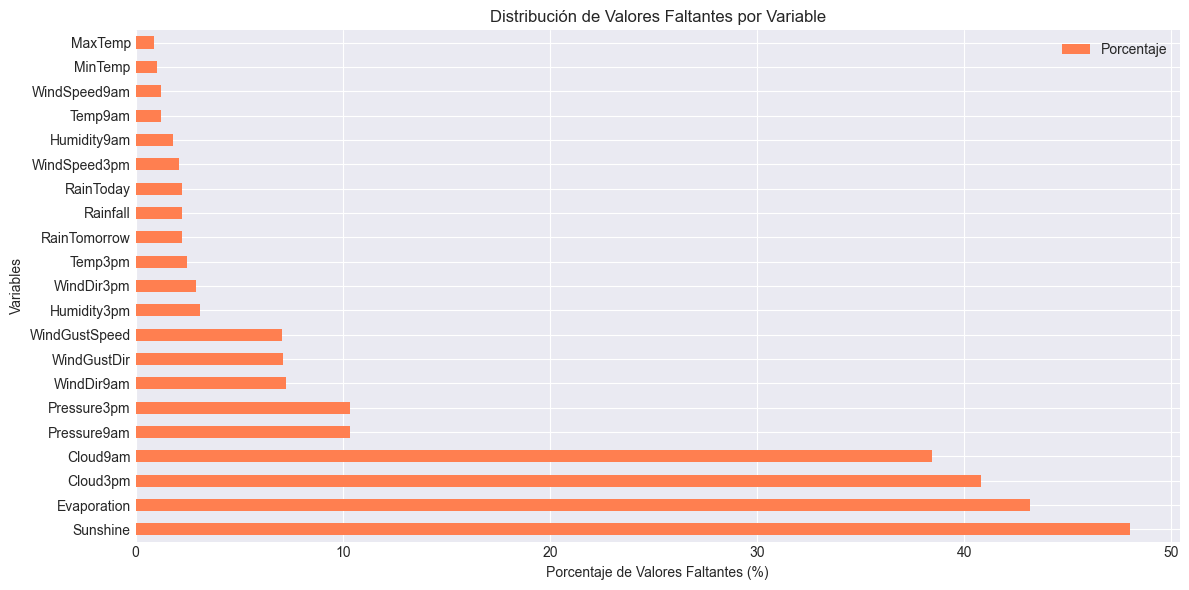

In [132]:
plt.figure(figsize=(12, 6))
missing_df['Porcentaje'].plot(kind='barh', color='coral')
plt.xlabel('Porcentaje de Valores Faltantes (%)')
plt.ylabel('Variables')
plt.title('Distribución de Valores Faltantes por Variable')
plt.legend()
plt.tight_layout()
plt.show()

### Matriz de correlacion de variables

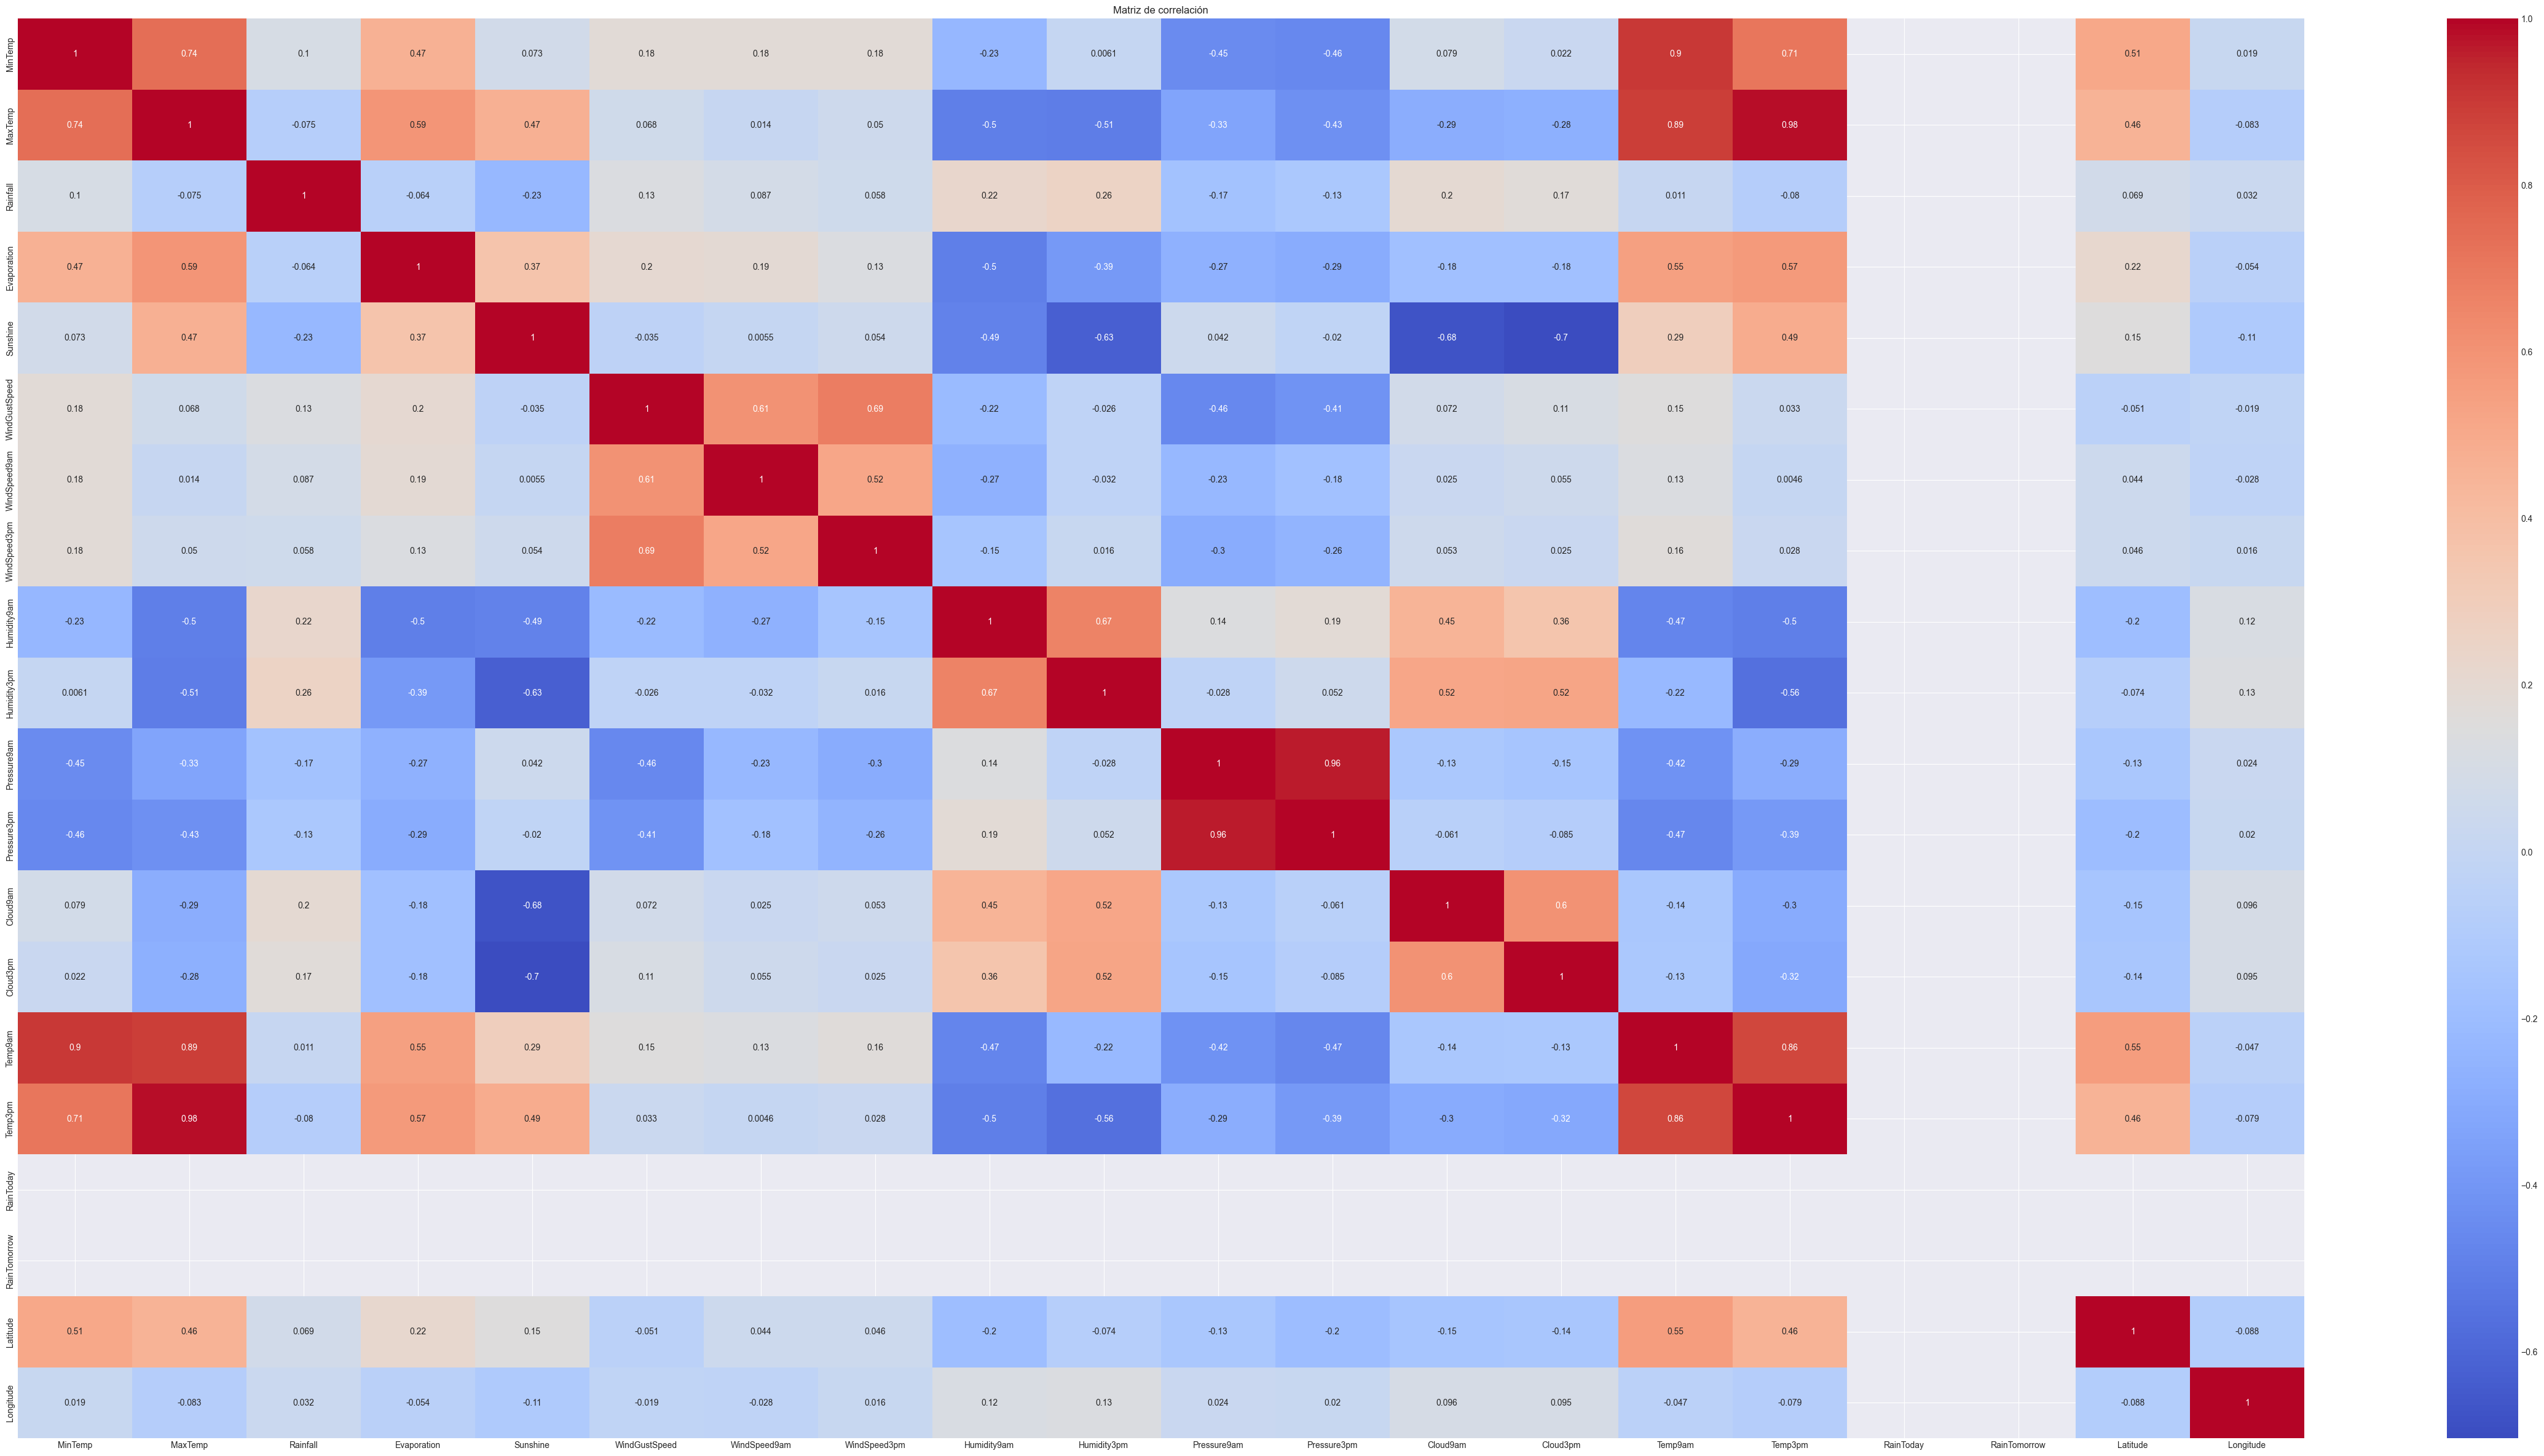

In [137]:

df['RainToday'] = df['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

corr = df.corr(numeric_only=True)
plt.figure(figsize=(60,30))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

## TODO

* ELEGIR UNA SOLA OPCION DE CLUSTERS
* VER SI PODEMOS HACER EL GRAFICO DE CIUDADES, CON EL MAPA DE AUSTRALIA
* 